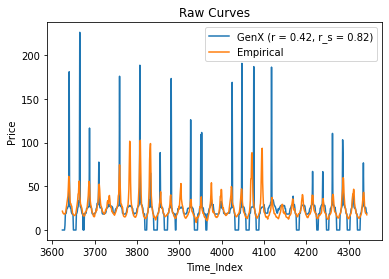

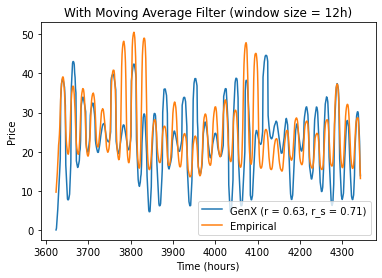

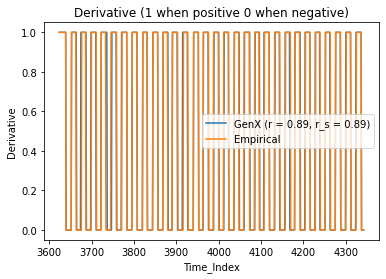

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load data from Excel file
df1 = pd.read_csv('prices.csv')
df2 = pd.read_csv('2019_empirical_electricity_prices.csv')

df1['Time_Index'] = range(min(df2['Time_Index']), max(df2['Time_Index'])+1)

x1 = df1['Time_Index']
y1 = df1['1']
x2 = df2['Time_Index']
y2 = df2['Prices']

# Apply moving average filter to smooth curves
window_size = 12  # Adjust as needed, half a day
y1_smooth = np.convolve(y1, np.ones(window_size)/window_size, mode='same')
y2_smooth = np.convolve(y2, np.ones(window_size)/window_size, mode='same')

# Calculate derivative of smoothed curves
dy1_dx = np.diff(y1_smooth)
dy1_dx[dy1_dx > 0] = 1
dy1_dx[dy1_dx <= 0] = 0

# 1 when derivative is positive, 0 when derivative is negative
dy2_dx = np.diff(y2_smooth)
dy2_dx[dy2_dx > 0] = 1
dy2_dx[dy2_dx <= 0] = 0

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(y1, y2)
corr_smooth, _ = pearsonr(y1_smooth, y2_smooth)
corr_deriv, _ = pearsonr(dy1_dx, dy2_dx)

# Calculate Spearman correlation coefficient
corr_spearman, _ = spearmanr(y1, y2)
corr_smooth_spearman, _ = spearmanr(y1_smooth, y2_smooth)
corr_deriv_spearman, _ = spearmanr(dy1_dx, dy2_dx)

# Plot raw curves
fig, ax = plt.subplots()
ax.plot(x1, y1, label=f'GenX (r = {corr:.2f}, r_s = {corr_spearman:.2f})')
ax.plot(x2, y2, label='Empirical')
ax.set_xlabel('Time_Index')
ax.set_ylabel('Price')
ax.legend()
ax.title.set_text('Raw Curves')
plt.show()

# Plot smooth curves
fig, ax = plt.subplots()
ax.plot(x1, y1_smooth, label=f'GenX (r = {corr_smooth:.2f}, r_s = {corr_smooth_spearman:.2f})')
ax.plot(x2, y2_smooth, label='Empirical')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Price')
ax.legend()
ax.title.set_text(f'With Moving Average Filter (window size = {window_size}h)')
plt.show()

# Plot derivatives
fig, ax = plt.subplots()
ax.plot(x1[:-1], dy1_dx, label=f'GenX (r = {corr_deriv:.2f}, r_s = {corr_deriv_spearman:.2f})')
ax.plot(x2[:-1], dy2_dx, label='Empirical')
ax.set_xlabel('Time_Index')
ax.set_ylabel('Derivative')
ax.legend()
ax.title.set_text('Derivative (1 when positive 0 when negative)')
plt.show()
